In [57]:
###Correlation between stations.

from viresclient import SwarmRequest
import hapiclient
from hapiclient.util import pythonshell
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from chaosmagpy import load_CHAOS_matfile
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000 # Modified Julian date
import tqdm
from sklearn.cluster import KMeans

import utils

In [58]:
###Step 1: get current directory and set PATH variable to where data will be saved.

import os

# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)

#define path to data folder where data will be placed. Print current path if you don't know what it is!
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data/'

Current working directory: /mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/dBdtCorrelation


In [59]:
###Step 2: Import dataset from csv
observatory='NGK'
obs=pd.read_csv(PATH + observatory +'19982020.csv',index_col='Timestamp')###Observatory Dataset downloaded
obs=obs.to_xarray() #Into xarray

print(obs)

<xarray.Dataset>
Dimensions:    (Timestamp: 11568960)
Coordinates:
  * Timestamp  (Timestamp) object '1998-01-01 00:00:00' ... '2019-12-31 23:59...
Data variables:
    B_N        (Timestamp) float64 -3.773 -4.174 -4.374 ... 15.56 15.66 15.86
    B_E        (Timestamp) float64 27.4 27.39 27.39 ... -24.61 -24.71 -24.92
    B_C        (Timestamp) float64 19.33 19.43 19.53 ... -41.75 -41.85 -41.85
    B_H        (Timestamp) float64 -2.636 -3.036 -3.237 ... 13.59 13.68 13.87
    dBdt       (Timestamp) float64 nan -0.4004 -0.2003 ... 0.09301 0.1854


In [60]:
###Step 2: Import dataset from csv
observatory='LER'
obs=pd.read_csv(PATH + observatory +'19982020.csv',index_col='Timestamp')###Observatory Dataset downloaded
obs=obs.to_xarray() #Into xarray

print(obs)

<xarray.Dataset>
Dimensions:    (Timestamp: 11568960)
Coordinates:
  * Timestamp  (Timestamp) object '1998-01-01 00:00:00' ... '2019-12-31 23:59...
Data variables:
    B_N        (Timestamp) float64 2.986 2.686 2.486 2.725 ... 5.127 5.127 5.328
    B_E        (Timestamp) float64 -30.74 -30.77 -30.79 ... 22.53 22.63 22.83
    B_C        (Timestamp) float64 12.41 12.71 12.71 13.01 ... -27.3 -27.3 -27.4
    B_H        (Timestamp) float64 -4.953 -5.255 -5.456 ... 11.89 11.89 12.09
    dBdt       (Timestamp) float64 nan -0.3024 -0.201 ... 0.001359 0.203


# Looping over all observatories and producing .csv file of dBdt.

In [61]:
###Step 3: loop over all data and download dbdt for each one.
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir(PATH) if isfile(join(PATH, f))]

In [62]:
allobsdbdt = pd.DataFrame()

allobsdbdt.index = obs['Timestamp']

In [63]:
print(onlyfiles)
for i in tqdm.tqdm(onlyfiles):
    obsiname=i[0:3]
    obsi=pd.read_csv(PATH + i,index_col='Timestamp')###Observatory Dataset downloaded
    #allobsdbdt = allobsdbdt.assign(obsiname=obsi['dBdt'])
    allobsdbdt[obsiname] = obsi['dBdt']
    print(obsi)

['ABG19982020.csv', 'ABK19982020.csv', 'BDV19982020.csv', 'BEL19982020.csv', 'BLC19982020.csv', 'BMT19982020.csv', 'BOU19982020.csv', 'BRW19982020.csv', 'BSL19982020.csv', 'CLF19982020.csv', 'CMO19982020.csv', 'CNB19982020.csv', 'ESK19982020.csv', 'EYR19982020.csv', 'FCC19982020.csv', 'FRD19982020.csv', 'FRN19982020.csv', 'FUR19982020.csv', 'GDH19982020.csv', 'GUA19982020.csv', 'GUI19982020.csv', 'HAD19982020.csv', 'HER19982020.csv', 'HLP19982020.csv', 'HON19982020.csv', 'HRB19982020.csv', 'IQA19982020.csv', 'IRT19982020.csv', 'KAK19982020.csv', 'LER19982020.csv', 'MEA19982020.csv', 'MMB19982020.csv', 'NAQ19982020.csv', 'NCK19982020.csv', 'NEW19982020.csv', 'NGK19982020.csv', 'NUR19982020.csv', 'OTT19982020.csv', 'PHU19982020.csv', 'RES19982020.csv', 'SBA19982020.csv', 'SIT19982020.csv', 'SJG19982020.csv', 'SOD19982020.csv', 'SPT19982020.csv', 'STJ19982020.csv', 'TAM19982020.csv', 'THL19982020.csv', 'THY19982020.csv', 'TUC19982020.csv', 'VIC19982020.csv', 'WNG19982020.csv', 'YKC1998202

  2%|███▏                                                                                                                                                                       | 1/53 [01:17<1:06:49, 77.11s/it]

                           B_N         B_E        B_C       B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00        NaN         NaN        NaN       NaN       NaN
1998-01-01 00:01:00        NaN         NaN        NaN       NaN       NaN
1998-01-01 00:02:00        NaN         NaN        NaN       NaN       NaN
1998-01-01 00:03:00        NaN         NaN        NaN       NaN       NaN
1998-01-01 00:04:00        NaN         NaN        NaN       NaN       NaN
...                        ...         ...        ...       ...       ...
2019-12-31 23:55:00 -12.286700  445.590274 -43.512401 -8.662295 -0.001343
2019-12-31 23:56:00 -12.286742  445.690325 -43.512609 -8.661586  0.000709
2019-12-31 23:57:00 -12.186582  445.490377 -43.612615 -8.562931  0.098654
2019-12-31 23:58:00 -12.086625  445.690428 -43.612621 -8.461474  0.101458
2019-12-31 23:59:00 -12.086262  445.390480 -43.812829 -8.463365 -0.001891

[11328480 rows x 5 columns]


  4%|██████▍                                                                                                                                                                    | 2/53 [02:44<1:10:48, 83.31s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.994639  19.770414   8.523948  -3.999403       NaN
1998-01-01 00:01:00  -3.795777  21.070346   9.024340  -3.691076  0.308327
1998-01-01 00:02:00  -4.496682  21.570279   9.422655  -4.347040 -0.655964
1998-01-01 00:03:00  -3.799206  21.870211  10.524200  -3.626624  0.720416
1998-01-01 00:04:00  -3.098268  22.170144  10.125749  -2.902753  0.723871
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  29.536325 -17.805848 -35.932921  28.745247  0.410346
2019-12-31 23:56:00  29.735901 -17.805937 -35.732559  28.942085  0.196838
2019-12-31 23:57:00  29.735708 -17.906026 -35.632660  28.925416 -0.016670
2019-12-31 23:58:00  29.935746 -18.306116 -35.632298  29.056857  0.131442
2019-12-31 23:59:00  30.136015 -18.706205 -35.731936  29.188543  0.131685

[11567520 rows x 5 columns]


  6%|█████████▋                                                                                                                                                                 | 3/53 [04:11<1:10:51, 85.03s/it]

                           B_N        B_E        B_C        B_H          dBdt
Timestamp                                                                    
1998-01-01 00:00:00  -2.538954  27.326545  24.393334  -0.987212           NaN
1998-01-01 00:01:00  -2.838957  27.426476  24.392270  -1.284485 -2.972726e-01
1998-01-01 00:02:00  -3.138961  27.526407  24.391205  -1.581757 -2.972721e-01
1998-01-01 00:03:00  -3.438964  27.526339  24.390141  -1.881658 -2.999013e-01
1998-01-01 00:04:00  -3.438969  27.426270  24.390074  -1.884294 -2.636033e-03
...                        ...        ...        ...        ...           ...
2019-12-31 23:55:00  12.539909 -23.681091 -48.927269  10.255112  7.248893e-03
2019-12-31 23:56:00  12.539916 -23.681187 -48.927383  10.255112 -1.287481e-07
2019-12-31 23:57:00  12.640255 -23.781282 -49.027164  10.347931  9.281893e-02
2019-12-31 23:58:00  12.640262 -23.881378 -49.027277  10.340682 -7.248625e-03
2019-12-31 23:59:00  12.639937 -23.981474 -48.927392  10.333102 

  8%|████████████▉                                                                                                                                                              | 4/53 [05:43<1:11:39, 87.75s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -9.092915  24.574182  23.112533  -9.613835       NaN
1998-01-01 00:01:00  -9.593237  24.374125  23.210831 -10.126737 -0.512901
1998-01-01 00:02:00 -10.092253  24.774068  22.909131 -10.597048 -0.470311
1998-01-01 00:03:00  -9.992252  25.274010  22.909389 -10.462869  0.134179
1998-01-01 00:04:00 -10.292248  24.573953  22.908341 -10.810340 -0.347471
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  20.718091 -20.254330 -43.496846  21.504489 -0.210084
2019-12-31 23:56:00  20.717784 -20.154414 -43.396969  21.515575  0.011086
2019-12-31 23:57:00  20.618131 -20.154498 -43.497419  21.416563 -0.099013
2019-12-31 23:58:00  20.718477 -20.354582 -43.597215  21.493446  0.076883
2019-12-31 23:59:00  20.818823 -20.654666 -43.697012  21.558934  0.065488

[11570400 rows x 5 columns]


  9%|████████████████▏                                                                                                                                                          | 5/53 [07:02<1:07:40, 84.58s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  27.081547  -4.740612 -39.733576  25.720583       NaN
1998-01-01 00:01:00  25.879560  -3.540656 -39.036613  24.541744 -1.178839
1998-01-01 00:02:00  27.782034  -4.840700 -40.031490  26.419045  1.877301
1998-01-01 00:03:00  28.383460  -4.940744 -40.629788  27.018466  0.599422
1998-01-01 00:04:00  27.279895  -4.040788 -39.332564  25.932232 -1.086234
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  -1.310781  24.331704  -0.690307  -0.760434 -0.086111
2019-12-31 23:56:00  -1.409592  24.631738  -1.190447  -0.846270 -0.085835
2019-12-31 23:57:00  -1.508929  24.731771  -1.490587  -0.941216 -0.094947
2019-12-31 23:58:00  -1.007743  25.031805  -1.989149  -0.427591  0.513625
2019-12-31 23:59:00  -0.508396  24.831838  -1.787714   0.062693  0.490284

[10782720 rows x 5 columns]


 11%|███████████████████▎                                                                                                                                                       | 6/53 [08:13<1:02:42, 80.04s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -12.275475   7.062075  24.871687 -17.045117       NaN
1998-01-01 00:01:00 -12.675426   7.012056  24.870322 -17.448183 -0.403066
1998-01-01 00:02:00 -12.975378   7.822037  24.869289 -17.646789 -0.198606
1998-01-01 00:03:00 -12.575333   7.862019  24.870573 -17.244858  0.401931
1998-01-01 00:04:00 -12.375287   7.052000  24.871195 -17.145411  0.099447
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  26.070186 -29.741847 -26.451026  29.867246  0.153730
2019-12-31 23:56:00  26.270219 -29.741946 -26.450451  30.065121  0.197876
2019-12-31 23:57:00  26.370915 -29.742044 -26.650205  30.164725  0.099604
2019-12-31 23:58:00  26.470617 -29.842143 -26.549962  30.248741  0.084016
2019-12-31 23:59:00  26.770319 -29.442242 -26.449056  30.603638  0.354897

[11570400 rows x 5 columns]


 13%|██████████████████████▊                                                                                                                                                      | 7/53 [09:26<59:32, 77.67s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.351468 -23.988900 -59.354751  -6.083707       NaN
1998-01-01 00:01:00  -4.352444 -23.548813 -59.057860  -6.982484 -0.898777
1998-01-01 00:02:00  -5.022430 -24.308727 -59.059875  -7.784997 -0.802512
1998-01-01 00:03:00  -5.112088 -24.328640 -59.159973  -7.876807 -0.091810
1998-01-01 00:04:00  -4.922079 -24.288553 -59.159145  -7.682640  0.194166
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  22.837351  19.223427  50.022772  24.048083 -0.014602
2019-12-31 23:56:00  22.737359  19.223496  50.022665  23.949175 -0.098908
2019-12-31 23:57:00  22.637368  19.323565  50.022558  23.864887 -0.084288
2019-12-31 23:58:00  22.537706  19.523634  49.922452  23.795547 -0.069340
2019-12-31 23:59:00  22.237716  19.523704  49.921683  23.498790 -0.296757

[11502720 rows x 5 columns]


 15%|██████████████████████████                                                                                                                                                   | 8/53 [10:51<59:54, 79.87s/it]

                           B_N        B_E        B_C       B_H      dBdt
Timestamp                                                               
1998-01-02 00:00:00  19.008791 -34.304368 -13.727158  2.953344       NaN
1998-01-02 00:01:00  19.248574 -33.614253 -13.626729  3.447250  0.493907
1998-01-02 00:02:00  21.798147 -33.714138 -13.421576  5.747975  2.300725
1998-01-02 00:03:00  21.427317 -33.864023 -13.022395  5.348113 -0.399862
1998-01-02 00:04:00  21.206487 -33.363908 -12.622908  5.343796 -0.004317
...                        ...        ...        ...       ...       ...
2019-12-31 23:55:00 -13.692489  22.664864   6.680238 -5.065014  0.921654
2019-12-31 23:56:00 -12.593395  23.064996   7.082567 -3.903819  1.161195
2019-12-31 23:57:00 -12.393686  22.765128   7.183057 -3.777299  0.126520
2019-12-31 23:58:00 -12.193159  21.165260   6.883548 -3.944557 -0.167259
2019-12-31 23:59:00 -10.292636  19.765391   6.587513 -2.410386  1.534171

[11525760 rows x 5 columns]


 17%|█████████████████████████████▍                                                                                                                                               | 9/53 [12:07<57:37, 78.58s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -6.677524  67.077362 -57.203521  -5.438035       NaN
1998-01-01 00:01:00  -7.377474  67.067465 -57.205332  -6.138039 -0.700004
1998-01-01 00:02:00  -8.177131  67.047567 -57.307435  -6.937938 -0.799899
1998-01-01 00:03:00  -8.356498  66.337670 -57.507723  -7.132118 -0.194180
1998-01-01 00:04:00  -8.256452  66.337772 -57.507192  -7.032092  0.100026
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  19.223055 -55.716623  52.003420  17.730082  0.000019
2019-12-31 23:56:00  19.223076 -55.616698  52.003678  17.732301  0.002219
2019-12-31 23:57:00  19.123390 -55.616773  51.903643  17.632637 -0.099664
2019-12-31 23:58:00  19.023411 -55.716849  51.903609  17.530481 -0.102156
2019-12-31 23:59:00  18.823433 -55.816924  51.903282  17.328350 -0.202131

[10817280 rows x 5 columns]


 19%|████████████████████████████████▍                                                                                                                                           | 10/53 [13:29<57:12, 79.83s/it]

                           B_N        B_E        B_C       B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  -0.258748   5.746406  14.989003 -0.074287       NaN
1998-01-01 00:01:00  -0.559435   5.646504  15.187945 -0.378469 -0.304182
1998-01-01 00:02:00  -0.858787   5.346602  14.986890 -0.688719 -0.310251
1998-01-01 00:03:00  -1.059475   5.346700  15.186166 -0.889267 -0.200547
1998-01-01 00:04:00  -1.159161   5.446798  15.085778 -0.985179 -0.095912
...                        ...        ...        ...       ...       ...
2019-12-31 23:55:00  10.376241 -72.119599 -33.713857  8.917764  0.001737
2019-12-31 23:56:00  10.376229 -72.019716 -33.713944  8.919502  0.001737
2019-12-31 23:57:00  10.476216 -72.119833 -33.713697  9.017720  0.098218
2019-12-31 23:58:00  10.476204 -72.219950 -33.713783  9.015955 -0.001765
2019-12-31 23:59:00  10.576192 -72.420067 -33.713536  9.112424  0.096469

[11566080 rows x 5 columns]


 21%|███████████████████████████████████▎                                                                                                                                      | 11/53 [15:10<1:00:19, 86.17s/it]

                          B_N       B_E        B_C       B_H      dBdt
Timestamp                                                             
1998-01-01 00:00:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:01:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:02:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:03:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:04:00       NaN       NaN        NaN       NaN       NaN
...                       ...       ...        ...       ...       ...
2019-12-31 23:55:00 -6.239600  7.295633  47.962349 -6.107992  0.669118
2019-12-31 23:56:00 -5.839156  7.195743  47.763531 -5.754514  0.353479
2019-12-31 23:57:00 -5.838968  6.995853  47.663678 -5.813010 -0.058497
2019-12-31 23:58:00 -6.638519  6.395963  47.461755 -6.753423 -0.940413
2019-12-31 23:59:00 -7.538588  5.996073  47.459572 -7.731220 -0.977797

[11544480 rows x 5 columns]


 23%|██████████████████████████████████████▉                                                                                                                                     | 12/53 [16:41<59:57, 87.75s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -21.014419 -41.950649 -16.586477 -29.670765       NaN
1998-01-01 00:01:00 -21.114442 -41.050653 -16.586716 -29.572645  0.098120
1998-01-01 00:02:00 -21.314464 -40.550657 -16.587271 -29.659114 -0.086469
1998-01-01 00:03:00 -21.415437 -39.350661 -16.287511 -29.496590  0.162524
1998-01-01 00:04:00 -20.715147 -39.050664 -16.385217 -28.747803  0.748787
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  54.951168 -27.105521 -34.313100  47.721841 -0.119466
2019-12-31 23:56:00  55.051227 -26.905548 -34.312811  47.863371  0.141530
2019-12-31 23:57:00  54.950970 -26.605574 -34.213155  47.831438 -0.031933
2019-12-31 23:58:00  54.750713 -26.305601 -34.113815  47.701951 -0.129487
2019-12-31 23:59:00  54.550141 -25.805627 -33.914477  47.616090 -0.085861

[11567520 rows x 5 columns]


 25%|██████████████████████████████████████████▏                                                                                                                                 | 13/53 [17:54<55:33, 83.34s/it]

                          B_N        B_E        B_C       B_H      dBdt
Timestamp                                                              
1998-01-01 00:00:00  1.229683 -28.684700  13.639825  0.757249       NaN
1998-01-01 00:01:00  0.930918 -28.714595  13.238833  0.456992 -0.300257
1998-01-01 00:02:00  0.679635 -29.244491  13.637995  0.153762 -0.303230
1998-01-01 00:03:00  0.179613 -29.294386  13.636372 -0.348745 -0.502506
1998-01-01 00:04:00  0.079588 -29.304282  13.636008 -0.449258 -0.100513
...                       ...        ...        ...       ...       ...
2019-12-31 23:55:00  9.563751  27.873149 -29.990905  8.415887 -0.105941
2019-12-31 23:56:00  9.563738  27.773270 -29.990975  8.412890 -0.002997
2019-12-31 23:57:00  9.664040  27.873392 -30.090731  8.516138  0.103248
2019-12-31 23:58:00  9.764027  27.973514 -30.090487  8.619072  0.102934
2019-12-31 23:59:00  9.964013  28.173636 -30.089928  8.824950  0.205878

[11570400 rows x 5 columns]


 26%|█████████████████████████████████████████████▍                                                                                                                              | 14/53 [19:20<54:35, 83.98s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -51.447890   7.552722 -27.494444 -44.186884       NaN
1998-01-01 00:01:00 -51.927868   8.682726 -27.495980 -44.182558  0.004326
1998-01-01 00:02:00 -51.986843   9.332729 -27.796106 -43.980503  0.202054
1998-01-01 00:03:00 -52.864137   9.622733 -28.598979 -44.672399 -0.691895
1998-01-01 00:04:00 -51.726807  10.772736 -27.795088 -43.173775  1.498624
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  40.843040 -25.736526 -11.022310  26.485344  0.132164
2019-12-31 23:56:00  40.742764 -25.436600 -10.922596  26.516432  0.031088
2019-12-31 23:57:00  40.642824 -25.336674 -10.922883  26.466071 -0.050360
2019-12-31 23:58:00  40.343219 -25.336748 -11.023839  26.192614 -0.273457
2019-12-31 23:59:00  39.843616 -25.236822 -11.125466  25.777515 -0.415099

[11426400 rows x 5 columns]


 28%|████████████████████████████████████████████████▋                                                                                                                           | 15/53 [20:50<54:19, 85.79s/it]

                           B_N       B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  36.069751  0.409704 -50.992360  37.116846       NaN
1998-01-01 00:01:00  37.974972  0.109659 -52.786514  39.021147  1.904301
1998-01-01 00:02:00  42.370941 -2.190387 -51.473230  43.410487  4.389340
1998-01-01 00:03:00  40.867532 -1.690432 -50.377532  41.908464 -1.502022
1998-01-01 00:04:00  39.769785 -2.390478 -51.180633  40.808796 -1.099668
...                        ...       ...        ...        ...       ...
2019-10-03 23:55:00        NaN       NaN        NaN        NaN       NaN
2019-10-03 23:56:00        NaN       NaN        NaN        NaN       NaN
2019-10-03 23:57:00        NaN       NaN        NaN        NaN       NaN
2019-10-03 23:58:00        NaN       NaN        NaN        NaN       NaN
2019-10-03 23:59:00        NaN       NaN        NaN        NaN       NaN

[11268000 rows x 5 columns]


 30%|███████████████████████████████████████████████████▉                                                                                                                        | 16/53 [22:22<54:04, 87.70s/it]

                          B_N       B_E        B_C       B_H      dBdt
Timestamp                                                             
1998-01-01 00:00:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:01:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:02:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:03:00       NaN       NaN        NaN       NaN       NaN
1998-01-01 00:04:00       NaN       NaN        NaN       NaN       NaN
...                       ...       ...        ...       ...       ...
2019-12-31 23:55:00 -4.972466 -9.206062  56.570899 -6.508131  0.018336
2019-12-31 23:56:00 -5.172536 -9.406073  56.570518 -6.741599 -0.233468
2019-12-31 23:57:00 -5.172606 -9.406085  56.570790 -6.741670 -0.000071
2019-12-31 23:58:00 -5.172676 -9.606096  56.571061 -6.778555 -0.036885
2019-12-31 23:59:00 -5.372745 -9.506108  56.570680 -6.956801 -0.178246

[11540160 rows x 5 columns]


 32%|███████████████████████████████████████████████████████▏                                                                                                                    | 17/53 [23:46<51:54, 86.53s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -15.685389 -29.718962 -43.975487 -22.635528       NaN
1998-01-01 00:01:00 -16.555039 -29.948889 -44.078145 -23.535058 -0.899530
1998-01-01 00:02:00 -16.745338 -30.008817 -43.978609 -23.734371 -0.199313
1998-01-01 00:03:00 -16.845315 -30.028745 -43.978783 -23.836108 -0.101737
1998-01-01 00:04:00 -16.655616 -29.978673 -43.878020 -23.639913  0.196196
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  43.663663  21.147193  41.444561  47.290332  0.239103
2019-12-31 23:56:00  43.663729  21.347274  41.444738  47.334721  0.044389
2019-12-31 23:57:00  43.663795  21.547355  41.444915  47.379112  0.044391
2019-12-31 23:58:00  43.563539  21.747436  41.544769  47.325675 -0.053437
2019-12-31 23:59:00  43.563606  22.047517  41.544947  47.392226  0.066551

[11427840 rows x 5 columns]


 34%|██████████████████████████████████████████████████████████▍                                                                                                                 | 18/53 [24:59<48:11, 82.63s/it]

                          B_N        B_E        B_C       B_H      dBdt
Timestamp                                                              
1998-01-01 00:00:00 -1.385122  25.558505  19.321906 -0.284396       NaN
1998-01-01 00:01:00 -1.385130  25.558430  19.321841 -0.284405 -0.000009
1998-01-01 00:02:00 -1.385139  25.558355  19.321776 -0.284415 -0.000009
1998-01-01 00:03:00 -1.385147  25.558280  19.321710 -0.284424 -0.000009
1998-01-01 00:04:00 -1.385155  25.558206  19.321645 -0.284433 -0.000009
...                       ...        ...        ...       ...       ...
2019-12-31 23:55:00  6.495942 -20.990951 -40.995872  4.790862  0.123359
2019-12-31 23:56:00  6.496612 -21.291052 -41.195980  4.773363 -0.017499
2019-12-31 23:57:00  6.495946 -21.091152 -40.996090  4.784799  0.011436
2019-12-31 23:58:00  6.496281 -21.391253 -41.096198  4.766968 -0.017831
2019-12-31 23:59:00  6.695948 -21.391353 -40.995640  4.966263  0.199295

[11568960 rows x 5 columns]


 36%|█████████████████████████████████████████████████████████████▋                                                                                                              | 19/53 [26:03<43:36, 76.96s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  20.825280 -25.229717 -13.023350  12.193012       NaN
1998-01-01 00:01:00  21.726270 -24.029632 -13.521311  13.670506  1.477495
1998-01-01 00:02:00  21.924361 -22.429547 -12.720837  14.907101  1.236594
1998-01-01 00:03:00  22.824905 -22.629463 -13.018799  15.429018  0.521917
1998-01-01 00:04:00  23.324111 -23.129378 -12.717654  15.452902  0.023884
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -11.791101  26.950149 -33.975583 -11.073360  0.689867
2019-12-31 23:56:00 -12.090532  25.850254 -34.276248 -11.909985 -0.836625
2019-12-31 23:57:00 -12.788623  24.750358 -35.177804 -13.084696 -1.174711
2019-12-31 23:58:00 -13.987606  24.150462 -35.680476 -14.419430 -1.334734
2019-12-31 23:59:00 -15.886140  23.750567 -36.384710 -16.241573 -1.822143

[10085760 rows x 5 columns]


 38%|████████████████████████████████████████████████████████████████▉                                                                                                           | 20/53 [27:10<40:40, 73.97s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  43.843276  -8.042989 -11.601981  44.266994       NaN
1998-01-01 00:01:00  43.213158  -7.012958 -11.503055  43.667767 -0.599227
1998-01-01 00:02:00  42.513041  -7.032928 -11.404236  42.967365 -0.700402
1998-01-01 00:03:00  42.213382  -7.042897 -11.604804  42.667542 -0.299823
1998-01-01 00:04:00  43.014028  -7.022867 -12.003689  43.468430  0.800888
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  -1.531597  54.792797  71.759557  -1.690238  0.201469
2019-12-31 23:56:00  -1.331362  54.892874  71.560016  -1.488616  0.201622
2019-12-31 23:57:00  -1.331280  54.992950  71.460170  -1.487126  0.001490
2019-12-31 23:58:00  -1.231198  55.193027  71.360476  -1.384238  0.102888
2019-12-31 23:59:00  -1.331116  55.393104  71.260476  -1.481329 -0.097091

[11432160 rows x 5 columns]


 40%|████████████████████████████████████████████████████████████████████▏                                                                                                       | 21/53 [28:25<39:39, 74.37s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  12.929732 -32.145561 -11.406965  45.224814       NaN
1998-01-01 00:01:00  12.629660 -32.205407 -11.407716  44.918866 -0.305948
1998-01-01 00:02:00  12.239868 -32.275253 -11.508718  44.522860 -0.396006
1998-01-01 00:03:00  11.940076 -32.325099 -11.609469  44.218982 -0.303878
1998-01-01 00:04:00  11.940002 -32.324945 -11.609379  44.218929 -0.000052
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -11.547099  32.417165  -4.695638 -44.449436 -0.011895
2019-12-31 23:56:00 -11.547170  32.417332  -4.695591 -44.449493 -0.000057
2019-12-31 23:57:00 -11.547241  32.417499  -4.695544 -44.449550 -0.000057
2019-12-31 23:58:00 -11.547592  32.517666  -4.595498 -44.438048  0.011502
2019-12-31 23:59:00 -11.447663  32.617833  -4.595171 -44.326971  0.111077

[10961280 rows x 5 columns]


 42%|███████████████████████████████████████████████████████████████████████▍                                                                                                    | 22/53 [29:42<38:47, 75.07s/it]

                          B_N        B_E        B_C       B_H      dBdt
Timestamp                                                              
1998-01-01 00:00:00  4.874039 -35.538921  11.874658  2.347279       NaN
1998-01-01 00:01:00  4.474667 -35.568809  11.673302  1.946837 -0.400442
1998-01-01 00:02:00  4.474635 -35.568698  11.673260  1.946816 -0.000022
1998-01-01 00:03:00  3.974934 -35.618586  11.571576  1.444653 -0.502162
1998-01-01 00:04:00  4.074244 -35.608474  11.771862  1.544470  0.099817
...                       ...        ...        ...       ...       ...
2019-12-31 23:55:00  8.022006  31.209079 -30.425865  8.815940 -0.002519
2019-12-31 23:56:00  8.021985  31.209206 -30.425931  8.815922 -0.000017
2019-12-31 23:57:00  8.021636  31.209333 -30.325999  8.815576 -0.000346
2019-12-31 23:58:00  8.121615  31.209459 -30.325737  8.915527  0.099951
2019-12-31 23:59:00  8.121594  31.309586 -30.325804  8.918011  0.002484

[11570400 rows x 5 columns]


 43%|██████████████████████████████████████████████████████████████████████████▋                                                                                                 | 23/53 [30:44<35:36, 71.22s/it]

                          B_N        B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  3.888676  14.674162  -6.572243  10.116564       NaN
1998-01-01 00:01:00  3.118711  14.684137  -6.574497   9.416678 -0.699887
1998-01-01 00:02:00  2.537494  14.764112  -6.176159   8.917723 -0.498955
1998-01-01 00:03:00  1.955964  14.854087  -5.677821   8.422543 -0.495180
1998-01-01 00:04:00  1.955995  14.854062  -5.677666   8.422562  0.000018
...                       ...        ...        ...        ...       ...
2019-12-31 23:55:00  0.977753 -32.601362  35.145224 -14.113258  0.000502
2019-12-31 23:56:00  0.978356 -32.601451  34.945351 -14.112756  0.000502
2019-12-31 23:57:00  0.978334 -32.601540  34.945477 -14.112815 -0.000059
2019-12-31 23:58:00  0.878313 -32.501629  34.945290 -14.158328 -0.045513
2019-12-31 23:59:00  1.078290 -32.401718  34.946042 -13.934784  0.223543

[11568960 rows x 5 columns]


 45%|█████████████████████████████████████████████████████████████████████████████▉                                                                                              | 24/53 [31:58<34:50, 72.09s/it]

                           B_N       B_E        B_C       B_H      dBdt
Timestamp                                                              
1998-01-01 00:00:00 -10.271647  4.428552  26.640605 -4.158178       NaN
1998-01-01 00:01:00 -10.471644  4.628495  26.639883 -4.348784 -0.190606
1998-01-01 00:02:00 -11.370984  5.028438  26.436876 -5.228803 -0.880019
1998-01-01 00:03:00 -11.770980  5.328380  26.435502 -5.614592 -0.385789
1998-01-01 00:04:00 -11.670979  5.228323  26.435760 -5.519297  0.095295
...                        ...       ...        ...       ...       ...
2019-12-31 23:55:00  11.842406 -4.299966 -69.882347  4.799510  0.009724
2019-12-31 23:56:00  11.942107 -4.400050 -69.782153  4.889018  0.089508
2019-12-31 23:57:00  12.042126 -4.500134 -69.781959  4.978842  0.089824
2019-12-31 23:58:00  12.342462 -4.600218 -69.881130  5.268036  0.289194
2019-12-31 23:59:00  12.341212 -5.100302 -69.481255  5.218230 -0.049806

[11534400 rows x 5 columns]


 47%|█████████████████████████████████████████████████████████████████████████████████▏                                                                                          | 25/53 [33:17<34:33, 74.05s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  14.632596 -12.210725 -11.809795  13.112395       NaN
1998-01-01 00:01:00  14.043489 -12.320679 -12.211020  12.513115 -0.599280
1998-01-01 00:02:00  13.553700 -12.410632 -12.312019  12.015135 -0.497980
1998-01-01 00:03:00  13.353685 -12.440586 -12.312361  11.813006 -0.202129
1998-01-01 00:04:00  13.263215 -12.460540 -12.112453  11.720417 -0.092590
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  41.162586 -17.465520 -31.419784  36.916350  0.000094
2019-12-31 23:56:00  41.062679 -17.365502 -31.420033  36.834726 -0.081625
2019-12-31 23:57:00  40.962771 -17.365485 -31.420281  36.736250 -0.098476
2019-12-31 23:58:00  40.863091 -17.265467 -31.520530  36.654850 -0.081401
2019-12-31 23:59:00  40.663184 -17.265450 -31.521006  36.457804 -0.197045

[11515680 rows x 5 columns]


 49%|████████████████████████████████████████████████████████████████████████████████████▍                                                                                       | 26/53 [34:24<32:19, 71.84s/it]

                          B_N        B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  9.020333  20.652531  18.477762  10.519056       NaN
1998-01-01 00:01:00  8.017662  20.652471  19.274348   9.517343 -1.001713
1998-01-01 00:02:00  7.917995  20.652410  19.173948   9.417769 -0.099574
1998-01-01 00:03:00  7.816991  20.752349  19.473545   9.321234 -0.096535
1998-01-01 00:04:00  6.715992  20.752288  19.769800   8.221287 -1.099947
...                       ...        ...        ...        ...       ...
2019-12-31 23:55:00  5.369311 -18.423112 -36.708964   2.979808  0.008330
2019-12-31 23:56:00  5.469320 -18.423200 -36.708752   3.079433  0.099625
2019-12-31 23:57:00  5.469329 -18.523288 -36.708875   3.070773 -0.008660
2019-12-31 23:58:00  5.569338 -18.523376 -36.708663   3.170398  0.099625
2019-12-31 23:59:00  5.569347 -18.823464 -36.708786   3.144417 -0.025980

[9702720 rows x 5 columns]


 51%|███████████████████████████████████████████████████████████████████████████████████████▌                                                                                    | 27/53 [35:39<31:32, 72.78s/it]

                           B_N         B_E         B_C        B_H      dBdt
Timestamp                                                                  
1998-01-01 00:00:00   4.383031  113.548699 -198.934195  54.023953       NaN
1998-01-01 00:01:00   4.581006  114.948751 -198.233563  55.014055  0.990102
1998-01-01 00:02:00   5.779245  114.748803 -197.630263  55.859906  0.845852
1998-01-01 00:03:00   7.777748  113.148854 -197.124831  56.519682  0.659775
1998-01-01 00:04:00   9.475984  111.148906 -196.520198  56.701237  0.181555
...                        ...         ...         ...        ...       ...
2019-12-31 23:55:00  33.813133 -109.355718   86.139243  -6.796350 -0.471293
2019-12-31 23:56:00  32.814074 -109.055639   85.736638  -7.575099 -0.778749
2019-12-31 23:57:00  32.613944 -109.255560   85.736168  -7.840952 -0.265853
2019-12-31 23:58:00  32.813546 -109.555482   85.836765  -7.786742  0.054209
2019-12-31 23:59:00  33.213147 -109.955403   85.937895  -7.593481  0.193262

[10234080 r

 53%|██████████████████████████████████████████████████████████████████████████████████████████▊                                                                                 | 28/53 [36:57<31:03, 74.55s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -22.449136  22.161834  27.086200 -20.587576       NaN
1998-01-01 00:01:00 -22.848778  22.151807  26.984869 -20.987304 -0.399728
1998-01-01 00:02:00 -22.448749  22.161780  26.986142 -20.587191  0.400113
1998-01-01 00:03:00 -22.049045  22.181753  27.087415 -20.187013  0.400178
1998-01-01 00:04:00 -22.428687  21.611726  26.986149 -20.588605 -0.401593
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  29.376967 -28.146905 -45.980337  26.222010  0.099793
2019-12-31 23:56:00  29.477027 -28.246992 -45.980087  26.314588  0.092578
2019-12-31 23:57:00  29.776761 -28.247079 -45.879186  26.613534  0.298946
2019-12-31 23:58:00  29.876495 -28.047166 -45.778936  26.727432  0.113898
2019-12-31 23:59:00  29.976556 -28.047253 -45.778686  26.827225  0.099793

[11401920 rows x 5 columns]


 55%|██████████████████████████████████████████████████████████████████████████████████████████████                                                                              | 29/53 [38:20<30:46, 76.95s/it]

                          B_N        B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  8.477818  -1.230161  16.661488   8.378831       NaN
1998-01-01 00:01:00  8.078813  -0.400172  16.360149   8.084441 -0.294390
1998-01-01 00:02:00  7.679168  -0.450184  16.258809   7.681680 -0.402761
1998-01-01 00:03:00  7.879840  -0.430195  16.059389   7.883290  0.201609
1998-01-01 00:04:00  7.980512  -0.420206  15.859650   7.984428  0.101138
...                       ...        ...        ...        ...       ...
2019-12-31 23:55:00 -7.170438 -42.661805  -8.548184 -12.990398 -0.098208
2019-12-31 23:56:00 -7.271449 -42.661874  -8.248520 -13.090508 -0.100110
2019-12-31 23:57:00 -7.471180 -42.661942  -8.349173 -13.288448 -0.197940
2019-12-31 23:58:00 -7.570271 -42.662011  -8.649506 -13.386655 -0.098208
2019-12-31 23:59:00 -7.770002 -42.662080  -8.750159 -13.584595 -0.197940

[11568960 rows x 5 columns]


 57%|█████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                          | 30/53 [39:19<27:25, 71.53s/it]

                          B_N        B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  2.986431 -30.735754  12.413619  -4.953068       NaN
1998-01-01 00:01:00  2.685543 -30.765657  12.712690  -5.255430 -0.302362
1998-01-01 00:02:00  2.485527 -30.785560  12.712053  -5.456428 -0.200998
1998-01-01 00:03:00  2.724636 -31.195463  13.012695  -5.256029  0.200398
1998-01-01 00:04:00  2.624329 -31.205366  13.112348  -5.356822 -0.100792
...                       ...        ...        ...        ...       ...
2019-12-31 23:55:00  5.127681  22.531875 -27.402553  11.885374 -0.102713
2019-12-31 23:56:00  5.127386  22.531991 -27.302628  11.885082 -0.000292
2019-12-31 23:57:00  5.127382  22.532108 -27.302702  11.885080 -0.000001
2019-12-31 23:58:00  5.127378  22.632224 -27.302777  11.886439  0.001359
2019-12-31 23:59:00  5.327664  22.832341 -27.402270  12.089432  0.202993

[11568960 rows x 5 columns]


 58%|████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                       | 31/53 [40:34<26:35, 72.52s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  13.901530 -17.791218 -50.247105   8.935610       NaN
1998-01-01 00:01:00  16.096040 -14.691119 -48.539968  12.036364  3.100754
1998-01-01 00:02:00  12.696292 -17.891019 -48.650600   7.765785 -4.270579
1998-01-01 00:03:00  10.199080 -19.590920 -49.558371   4.845392 -2.920392
1998-01-01 00:04:00   9.601540 -19.190821 -50.360110   4.414913 -0.430479
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00   7.413108  -1.750393  41.206270   5.716982  0.024749
2019-12-31 23:56:00   7.213048  -1.550363  41.205838   5.573556 -0.143426
2019-12-31 23:57:00   6.813308  -1.650332  41.104773   5.161520 -0.412036
2019-12-31 23:58:00   6.413567  -1.550302  41.003707   4.799704 -0.361816
2019-12-31 23:59:00   5.814144  -1.250272  40.802007   4.294834 -0.504870

[11472480 rows x 5 columns]


 60%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                                    | 32/53 [41:48<25:37, 73.20s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -4.210957  -2.101285  14.243584  -4.437707       NaN
1998-01-01 00:01:00  -4.431602  -1.361291  14.442788  -4.541679 -0.103972
1998-01-01 00:02:00  -4.821240  -1.421296  14.341424  -4.935909 -0.394231
1998-01-01 00:03:00  -4.521889  -1.371301  14.542373  -4.632429  0.303480
1998-01-01 00:04:00  -4.431529  -1.361307  14.442619  -4.541609  0.090820
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -13.322494 -30.489341 -12.707589 -18.580707 -0.114694
2019-12-31 23:56:00 -13.322531 -30.289387 -12.707627 -18.548898  0.031809
2019-12-31 23:57:00 -13.222569 -30.289432 -12.707330 -18.450219  0.098679
2019-12-31 23:58:00 -13.322605 -30.189478 -12.707704 -18.533059 -0.082840
2019-12-31 23:59:00 -13.522977 -30.089523 -12.608414 -18.714953 -0.181894

[11570400 rows x 5 columns]


 62%|███████████████████████████████████████████████████████████████████████████████████████████████████████████                                                                 | 33/53 [42:52<23:26, 70.33s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  28.244092 -21.257662 -11.454866  11.192004       NaN
1998-01-01 00:01:00  26.744543 -22.357551 -11.659073   9.344826 -1.847178
1998-01-01 00:02:00  28.147257 -21.557441 -12.655030  10.959688  1.614862
1998-01-01 00:03:00  31.740864 -20.457330 -10.444746  14.627557  3.667869
1998-01-01 00:04:00  32.233631 -21.357219  -7.943276  14.611418 -0.016139
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  -9.819303  27.516906  -6.890604   6.679904 -0.278043
2019-12-31 23:56:00 -10.018272  27.317020  -7.291142   6.420906 -0.258999
2019-12-31 23:57:00  -9.818379  27.117133  -7.290544   6.532208  0.111303
2019-12-31 23:58:00  -9.519055  27.117247  -7.089663   6.810143  0.277935
2019-12-31 23:59:00  -9.319730  27.017360  -6.889066   6.958082  0.147939

[10329120 rows x 5 columns]


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                             | 34/53 [43:51<21:10, 66.89s/it]

                           B_N        B_E        B_C        B_H          dBdt
Timestamp                                                                    
1998-01-01 00:00:00  -4.426822  17.900687  17.410341  -3.473258           NaN
1998-01-01 00:01:00  -4.926822  17.890624  17.408602  -3.973277 -5.000188e-01
1998-01-01 00:02:00  -5.246489  18.490560  17.307465  -4.269704 -2.964275e-01
1998-01-01 00:03:00  -5.446826  18.480497  17.406729  -4.470279 -2.005753e-01
1998-01-01 00:04:00  -5.326830  17.870434  17.407064  -4.373764  9.651520e-02
...                        ...        ...        ...        ...           ...
2019-12-31 23:55:00  17.054923 -27.093613 -54.802053  14.640945  1.078136e-01
2019-12-31 23:56:00  17.054930 -27.093704 -54.802173  14.640945 -4.132307e-07
2019-12-31 23:57:00  16.954938 -27.193795 -54.802628  14.533131 -1.078144e-01
2019-12-31 23:58:00  17.054944 -27.293885 -54.802413  14.624651  9.152013e-02
2019-12-31 23:59:00  17.154951 -27.593976 -54.802199  14.699881 

 66%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                          | 35/53 [45:07<20:53, 69.61s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00   1.029786 -20.299579 -53.405784  -0.309799       NaN
1998-01-01 00:01:00  -1.580239 -20.059482 -53.414327  -2.708325 -2.398526
1998-01-01 00:02:00  -2.149608 -20.249385 -53.616061  -3.308529 -0.600204
1998-01-01 00:03:00  -1.289986 -19.959288 -53.513025  -2.401280  0.907249
1998-01-01 00:04:00  -1.859688 -20.149191 -53.614759  -3.001800 -0.600520
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  18.809497   0.861294  43.543995  14.491807  0.000326
2019-12-31 23:56:00  18.709487   0.961349  43.543874  14.420988 -0.070819
2019-12-31 23:57:00  18.509811   0.961404  43.443419  14.228083 -0.192905
2019-12-31 23:58:00  18.309802   1.261459  43.442964  14.112241 -0.115843
2019-12-31 23:59:00  17.810128   1.461514  43.341509  13.681086 -0.431155

[11437920 rows x 5 columns]


 68%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                                       | 36/53 [46:31<20:56, 73.94s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -3.773208  27.396174  19.330086  -2.635878       NaN
1998-01-01 00:01:00  -4.173536  27.386102  19.428714  -3.036327 -0.400449
1998-01-01 00:02:00  -4.373865  27.386031  19.527994  -3.236618 -0.200291
1998-01-01 00:03:00  -4.674845  27.375959  19.826947  -3.537738 -0.301121
1998-01-01 00:04:00  -4.474199  27.385888  19.627533  -3.336935  0.200804
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  15.555948 -24.614616 -41.745580  13.589963  0.107148
2019-12-31 23:56:00  15.655632 -24.514715 -41.645363  13.696461  0.106498
2019-12-31 23:57:00  15.555969 -24.614813 -41.745797  13.589970 -0.106491
2019-12-31 23:58:00  15.656305 -24.714911 -41.845580  13.682978  0.093008
2019-12-31 23:59:00  15.856315 -24.915009 -41.845037  13.868343  0.185364

[11568960 rows x 5 columns]


 70%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                    | 37/53 [47:31<18:38, 69.88s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -9.493634  17.777730  16.615867  -4.466385       NaN
1998-01-01 00:01:00  -9.793333  18.277672  16.514930  -4.715038 -0.248653
1998-01-01 00:02:00  -9.793610  18.577615  16.614858  -4.685567  0.029472
1998-01-01 00:03:00  -9.893887  18.677558  16.714496  -4.775435 -0.089869
1998-01-01 00:04:00 -10.094739  18.377501  17.013846  -5.005060 -0.229624
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  24.675701 -24.023562 -51.561391  14.946728  0.197614
2019-12-31 23:56:00  24.775737 -24.023642 -51.561220  15.045546  0.098818
2019-12-31 23:57:00  24.875485 -24.123722 -51.461049  15.128609  0.083063
2019-12-31 23:58:00  24.975521 -24.423803 -51.460877  15.181020  0.052411
2019-12-31 23:59:00  25.075845 -24.623883 -51.560705  15.249188  0.068169

[9336960 rows x 5 columns]


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                | 38/53 [48:46<17:49, 71.29s/it]

                           B_N       B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00  27.600346  0.494313 -60.096202  27.899666       NaN
1998-01-01 00:01:00  27.300579  0.094297 -60.196929  27.507889 -0.391777
1998-01-01 00:02:00  26.001826 -0.505718 -60.601013  26.099138 -1.408751
1998-01-01 00:03:00  25.901387  0.194267 -60.501070  26.180325  0.081187
1998-01-01 00:04:00  26.100946  0.394251 -60.400120  26.424248  0.243923
...                        ...       ...        ...        ...       ...
2019-12-31 23:55:00 -15.180170 -1.115272  37.984197 -16.500650 -0.000431
2019-12-31 23:56:00 -15.379945 -1.115253  37.883753 -16.694872 -0.194222
2019-12-31 23:57:00 -15.479721 -1.115233  37.783646 -16.791872 -0.097000
2019-12-31 23:58:00 -15.479834 -1.315213  37.783874 -16.838788 -0.046916
2019-12-31 23:59:00 -15.479610 -1.515193  37.684102 -16.885375 -0.046587

[11537280 rows x 5 columns]


 74%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                             | 39/53 [49:46<15:51, 67.98s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -15.680672  29.988935  65.452967 -15.092441       NaN
1998-01-01 00:01:00 -16.080199  29.988926  65.251945 -15.491923 -0.399482
1998-01-01 00:02:00 -16.279952  30.088916  65.151372 -15.690139 -0.198216
1998-01-01 00:03:00 -15.980155  29.888906  65.251920 -15.393403  0.296736
1998-01-01 00:04:00 -15.879908  30.088897  65.152020 -15.290141  0.103262
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  47.658963 -15.714944 -68.334322  47.017730  0.105827
2019-12-31 23:56:00  47.858741 -15.715034 -68.234061  47.217418  0.199689
2019-12-31 23:57:00  48.058518 -15.615123 -68.133800  47.420043  0.202625
2019-12-31 23:58:00  48.158520 -15.515213 -68.133763  47.522935  0.102892
2019-12-31 23:59:00  48.258298 -15.515302 -68.033726  47.622667  0.099732

[8733600 rows x 5 columns]


 75%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                          | 40/53 [51:08<15:38, 72.16s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  25.949298   1.403224 -12.424209  21.255512       NaN
1998-01-01 00:01:00  25.249161   1.803192 -12.425380  20.997987 -0.257525
1998-01-01 00:02:00  25.547823   2.703159 -11.724836  21.819362  0.821375
1998-01-01 00:03:00  26.246312   3.303127 -10.923608  22.740005  0.920643
1998-01-01 00:04:00  27.345487   2.503095 -10.521692  23.029779  0.289774
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -23.725567  33.130714 -12.498312 -10.540775 -0.341821
2019-12-31 23:56:00 -24.025190  33.030764 -12.798774 -10.856531 -0.315756
2019-12-31 23:57:00 -24.024813  32.930815 -13.098721 -10.890153 -0.033622
2019-12-31 23:58:00 -23.624437  33.130866 -13.397982 -10.445616  0.444537
2019-12-31 23:59:00 -23.824232  32.630917 -13.598272 -10.803434 -0.357818

[11459520 rows x 5 columns]


 77%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                       | 41/53 [52:18<14:17, 71.49s/it]

                           B_N        B_E         B_C         B_H      dBdt
Timestamp                                                                  
1998-01-01 00:00:00  25.213320 -37.016147  -98.662135   68.890052       NaN
1998-01-01 00:01:00  21.980244 -34.206210 -100.857551   67.076094 -1.813958
1998-01-01 00:02:00  22.400907 -32.946273 -100.358030   67.972225  0.896131
1998-01-01 00:03:00  24.164203 -37.126336  -97.960368   67.886468 -0.085757
1998-01-01 00:04:00  27.207498 -40.736398  -95.564481   69.203720  1.317252
...                        ...        ...         ...         ...       ...
2019-12-31 23:55:00   3.018775 -67.260394 -112.189217 -103.424103  0.045520
2019-12-31 23:56:00   4.418616 -68.460502 -112.291038 -102.745059  0.679045
2019-12-31 23:57:00   6.618872 -70.160610 -112.093969 -101.590481  1.154578
2019-12-31 23:58:00   9.620098 -73.160719 -111.198009 -100.331832  1.258649
2019-12-31 23:59:00  10.720078 -76.460827 -111.199414 -100.894283 -0.562450

[11527200 r

 79%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                   | 42/53 [53:26<12:53, 70.33s/it]

                           B_N        B_E        B_C       B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00   9.894970 -29.258150 -29.290974 -1.947526       NaN
1998-01-01 00:01:00   8.635211 -30.338023 -29.394779 -3.543965 -1.596438
1998-01-01 00:02:00   8.654833 -31.837897 -29.294658 -4.154902 -0.610937
1998-01-01 00:03:00   8.804147 -29.757771 -29.094139 -3.147319  1.007583
1998-01-01 00:04:00   7.445309 -30.377645 -29.498249 -4.640850 -1.493531
...                        ...        ...        ...       ...       ...
2019-12-31 23:55:00  11.942086  -3.728988  52.532822  9.534665 -0.000010
2019-12-31 23:56:00  11.842050  -3.828911  52.532709  9.407907 -0.126759
2019-12-31 23:57:00  11.642015  -3.628835  52.532289  9.282445 -0.125462
2019-12-31 23:58:00  11.342594  -3.428758  52.331563  9.062833 -0.219612
2019-12-31 23:59:00  10.642868  -3.028682  52.229609  8.528025 -0.534807

[11544480 rows x 5 columns]


 81%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                | 43/53 [54:32<11:31, 69.17s/it]

                          B_N        B_E        B_C        B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00 -8.637707 -13.008153 -73.915484  -9.701887       NaN
1998-01-01 00:01:00 -8.927445 -13.068227 -74.015743  -9.997789 -0.295901
1998-01-01 00:02:00 -9.327184 -13.148301 -74.116219 -10.405458 -0.407669
1998-01-01 00:03:00 -9.517121 -13.188375 -74.116281 -10.599576 -0.194118
1998-01-01 00:04:00 -9.417058 -13.168449 -74.115769 -10.497553  0.102023
...                       ...        ...        ...        ...       ...
2019-12-31 23:55:00  0.425594  -4.457676  65.793778  -1.830289 -0.000025
2019-12-31 23:56:00  0.325385  -4.457737  65.893902  -1.927909 -0.097620
2019-12-31 23:57:00  0.325374  -4.457798  65.894223  -1.927934 -0.000025
2019-12-31 23:58:00  0.325363  -4.457860  65.894545  -1.927959 -0.000025
2019-12-31 23:59:00  0.225154  -4.457921  65.994668  -2.025579 -0.097620

[11407680 rows x 5 columns]


 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 44/53 [55:43<10:26, 69.61s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -5.052506  19.008220  22.501288   0.889902       NaN
1998-01-01 00:01:00  -5.252483  19.808162  22.500738   0.809443 -0.080459
1998-01-01 00:02:00  -5.452699  20.608103  22.600188   0.728807 -0.080637
1998-01-01 00:03:00  -4.553397  20.808045  22.902268   1.647718  0.918911
1998-01-01 00:04:00  -2.952901  20.307987  22.706023   3.157476  1.509758
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  26.319850 -16.879778 -45.149224  18.834882  0.292562
2019-12-31 23:56:00  26.520137 -16.979855 -45.248855  19.008496  0.173614
2019-12-31 23:57:00  26.419946 -17.079933 -45.149204  18.888878 -0.119618
2019-12-31 23:58:00  26.519993 -17.380011 -45.149075  18.921028  0.032149
2019-12-31 23:59:00  26.720280 -17.680089 -45.248706  19.051010  0.129982

[11484000 rows x 5 columns]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                          | 45/53 [56:56<09:24, 70.58s/it]

                          B_N        B_E        B_C       B_H      dBdt
Timestamp                                                              
1998-01-01 00:00:00  3.885621 -35.436622  10.980231  2.575665       NaN
1998-01-01 00:01:00  3.585252 -35.446498  11.079219  2.275248 -0.300417
1998-01-01 00:02:00  3.185212 -35.476374  11.077879  1.874134 -0.401114
1998-01-01 00:03:00  2.785502 -35.496250  10.976538  1.473953 -0.400181
1998-01-01 00:04:00  2.885130 -35.496126  11.076845  1.573407  0.099453
...                       ...        ...        ...       ...       ...
2019-12-31 23:55:00  3.783834  34.124714 -30.656968  3.784321 -0.000037
2019-12-31 23:56:00  3.683797  34.124847 -30.657354  3.684288 -0.100033
2019-12-31 23:57:00  3.783759  34.124981 -30.657080  3.784248  0.099959
2019-12-31 23:58:00  3.883721  34.225114 -30.656807  3.885041  0.100793
2019-12-31 23:59:00  3.884013  34.325248 -30.756863  3.886168  0.001127

[11456640 rows x 5 columns]


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                      | 46/53 [57:53<07:47, 66.79s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-02 00:00:00        NaN        NaN        NaN        NaN       NaN
1998-01-02 00:01:00        NaN        NaN        NaN        NaN       NaN
1998-01-02 00:02:00        NaN        NaN        NaN        NaN       NaN
1998-01-02 00:03:00        NaN        NaN        NaN        NaN       NaN
1998-01-02 00:04:00        NaN        NaN        NaN        NaN       NaN
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -19.013579  21.457950  21.129895 -10.629377 -0.034524
2019-12-31 23:56:00 -19.013373  21.358051  21.030036 -10.659427 -0.030050
2019-12-31 23:57:00 -19.113166  21.158153  20.929841 -10.815059 -0.155632
2019-12-31 23:58:00 -19.112960  21.058254  20.829982 -10.845108 -0.030049
2019-12-31 23:59:00 -19.013089  20.958356  20.830456 -10.780169  0.064939

[10625760 rows x 5 columns]


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                   | 47/53 [59:00<06:40, 66.81s/it]

                          B_N         B_E        B_C       B_H      dBdt
Timestamp                                                               
1998-01-01 00:00:00 -0.167265  156.244748   3.538178  3.700339       NaN
1998-01-01 00:01:00 -0.667536  156.044855   3.636963  3.195030 -0.505309
1998-01-01 00:02:00 -1.167807  155.744963   3.735748  2.687118 -0.507912
1998-01-01 00:03:00 -1.467839  155.845070   3.735011  2.389794 -0.297325
1998-01-01 00:04:00 -1.367873  156.045178   3.735232  2.494937  0.105144
...                       ...         ...        ...       ...       ...
2019-12-31 23:55:00  1.796123 -341.580213 -30.079621 -3.036259  0.000882
2019-12-31 23:56:00  1.896087 -341.680322 -30.079429 -2.937220  0.099039
2019-12-31 23:57:00  1.896291 -341.680431 -30.179476 -2.937018  0.000202
2019-12-31 23:58:00  1.896256 -341.680540 -30.179523 -2.937055 -0.000037
2019-12-31 23:59:00  1.996221 -341.880648 -30.179331 -2.838934  0.098121

[11337120 rows x 5 columns]


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                | 48/53 [1:00:05<05:31, 66.31s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  23.113818 -15.270246  -0.114937   9.684322       NaN
1998-01-01 00:01:00  22.813696 -14.870210  -0.115359   9.933261  0.248939
1998-01-01 00:02:00  23.214572 -13.970173  -0.814782  10.918451  0.985189
1998-01-01 00:03:00  24.314448 -13.870137  -0.813207  11.444908  0.526458
1998-01-01 00:04:00  24.214754 -14.070101  -1.113344  11.221821 -0.223088
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00 -17.930312  34.015197 -14.209048   0.707616 -0.012534
2019-12-31 23:56:00 -18.229990  34.615290 -14.509478   0.908381  0.200765
2019-12-31 23:57:00 -18.129383  34.715384 -15.009337   1.050279  0.141898
2019-12-31 23:58:00 -18.129633  34.815477 -14.909339   1.119577  0.069297
2019-12-31 23:59:00 -18.229454  34.915571 -15.109484   1.117201 -0.002375

[11183040 rows x 5 columns]


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏            | 49/53 [1:01:13<04:27, 66.77s/it]

                           B_N        B_E        B_C        B_H          dBdt
Timestamp                                                                    
1998-01-01 00:00:00  -2.016705  22.076752  26.391764  -0.371645           NaN
1998-01-01 00:01:00  -2.216706  22.076690  26.391028  -0.571473 -1.998289e-01
1998-01-01 00:02:00  -2.717041  22.376629  26.489285  -1.058816 -4.873421e-01
1998-01-01 00:03:00  -3.116707  22.376568  26.387879  -1.458133 -3.993174e-01
1998-01-01 00:04:00  -3.317043  22.276506  26.487142  -1.662483 -2.043499e-01
...                        ...        ...        ...        ...           ...
2019-12-31 23:55:00  14.171336 -21.707238 -47.980346  11.860089  8.370156e-03
2019-12-31 23:56:00  14.271677 -21.707326 -48.080133  11.960071  9.998161e-02
2019-12-31 23:57:00  14.271684 -21.707414 -48.080255  11.960070 -8.225325e-07
2019-12-31 23:58:00  14.371690 -21.907503 -48.080043  12.042976  8.290628e-02
2019-12-31 23:59:00  14.471696 -22.107591 -48.079830  12.125884 

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 50/53 [1:02:16<03:16, 65.55s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00 -15.546068 -27.384102 -36.599116 -24.895282       NaN
1998-01-01 00:01:00 -16.575405 -28.324029 -36.802077 -26.086451 -1.191169
1998-01-01 00:02:00 -17.364743 -28.483956 -37.004313 -26.891812 -0.805361
1998-01-01 00:03:00 -17.554688 -28.513883 -37.004735 -27.083964 -0.192152
1998-01-01 00:04:00 -17.464937 -28.503810 -36.904310 -26.993954  0.090011
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  37.833814  29.556719  36.216904  46.838090  0.015734
2019-12-31 23:56:00  37.833885  29.656811  36.217087  46.853824  0.015735
2019-12-31 23:57:00  37.833956  29.856904  36.217271  46.885209  0.031385
2019-12-31 23:58:00  37.734028  30.056996  36.217152  46.817829 -0.067381
2019-12-31 23:59:00  37.634401  30.257089  36.117033  46.750748 -0.067080

[11511360 rows x 5 columns]


 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 51/53 [1:03:18<02:08, 64.37s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -6.382872 -29.872785 -44.846848 -14.867246       NaN
1998-01-01 00:01:00  -8.380568 -29.772684 -45.553370 -16.712771 -1.845525
1998-01-01 00:02:00  -8.580275 -29.872583 -45.653893 -16.934517 -0.221746
1998-01-01 00:03:00  -8.380651 -29.572482 -45.553083 -16.644989  0.289528
1998-01-01 00:04:00  -8.680357 -29.572381 -45.653939 -16.926919 -0.281929
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  26.617807   3.991820  51.507792  25.922946  0.000340
2019-12-31 23:56:00  26.518478   4.091884  51.307667  25.855331 -0.067615
2019-12-31 23:57:00  26.418814   4.191947  51.207541  25.787396 -0.067935
2019-12-31 23:58:00  26.219151   4.292010  51.107082  25.623401 -0.163995
2019-12-31 23:59:00  25.819823   4.592073  50.905957  25.323183 -0.300218

[11494080 rows x 5 columns]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 52/53 [1:04:25<01:05, 65.16s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  -2.660706 -83.314043  16.060248  -3.227075       NaN
1998-01-01 00:01:00  -3.663914 -83.313965  17.056970  -4.230283 -1.003207
1998-01-01 00:02:00  -3.660714 -84.313886  16.056910  -4.227948  0.002335
1998-01-01 00:03:00  -3.660721 -83.313807  16.056844  -4.227089  0.000859
1998-01-01 00:04:00  -4.663929 -84.313728  17.053567  -5.231162 -1.004073
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  14.700897 -18.489037 -38.869090  14.529952  0.111224
2019-12-31 23:56:00  14.700905 -18.489142 -38.869190  14.529954  0.000002
2019-12-31 23:57:00  14.800912 -18.489246 -38.868969  14.629803  0.099849
2019-12-31 23:58:00  14.900920 -18.589350 -38.868749  14.724125  0.094322
2019-12-31 23:59:00  15.000927 -18.789454 -38.868528  14.812921  0.088796

[11566080 rows x 5 columns]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53/53 [1:05:15<00:00, 73.88s/it]

                           B_N        B_E        B_C        B_H      dBdt
Timestamp                                                                
1998-01-01 00:00:00  29.058687 -10.862854 -46.077345  20.665963       NaN
1998-01-01 00:01:00  31.559113  -7.662753 -46.270347  24.293328  3.627365
1998-01-01 00:02:00  34.055956  -8.162652 -45.163354  26.337694  2.044366
1998-01-01 00:03:00  33.753636  -8.462551 -44.364078  25.936282 -0.401412
1998-01-01 00:04:00  32.452973  -8.862450 -44.167555  24.589374 -1.346908
...                        ...        ...        ...        ...       ...
2019-12-31 23:55:00  -0.067503 -15.943511  20.760312  -3.200538  0.152552
2019-12-31 23:56:00   0.131567 -15.443500  21.061034  -2.867739  0.332799
2019-12-31 23:57:00  -0.069638 -15.043489  21.460653  -2.947115 -0.079376
2019-12-31 23:58:00   0.027502 -14.043478  22.461097  -2.570029  0.377086
2019-12-31 23:59:00  -0.276184 -13.043467  23.760436  -2.577161 -0.007132

[9413280 rows x 5 columns]


In [64]:
###Step 4: save as a csv file.
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data_merged/'

###Save to netcdf file
#MAY NOT BE IN CORRECT FORMAT. May require xarray.
#allobsdbdt.to_netcdf(path = PATH+'mergeddatafromobsdata.nc')

###Save to csv file
# Save the DataFrame to a CSV file
allobsdbdt.to_csv(PATH+'mergeddatafromobsdata.csv',index=True)

# Correlation of different stations dBdt values.

In [65]:
###Require cell here to import from csv exported above.

In [66]:
print(allobsdbdt)

                          ABG       ABK           BDV       BEL       BLC  \
1998-01-01 00:00:00       NaN       NaN           NaN       NaN       NaN   
1998-01-01 00:01:00       NaN  0.308327 -2.972726e-01 -0.512901 -1.178839   
1998-01-01 00:02:00       NaN -0.655964 -2.972721e-01 -0.470311  1.877301   
1998-01-01 00:03:00       NaN  0.720416 -2.999013e-01  0.134179  0.599422   
1998-01-01 00:04:00       NaN  0.723871 -2.636033e-03 -0.347471 -1.086234   
...                       ...       ...           ...       ...       ...   
2019-12-31 23:55:00 -0.001343  0.410346  7.248893e-03 -0.210084 -0.086111   
2019-12-31 23:56:00  0.000709  0.196838 -1.287481e-07  0.011086 -0.085835   
2019-12-31 23:57:00  0.098654 -0.016670  9.281893e-02 -0.099013 -0.094947   
2019-12-31 23:58:00  0.101458  0.131442 -7.248625e-03  0.076883  0.513625   
2019-12-31 23:59:00 -0.001891  0.131685 -7.579840e-03  0.065488  0.490284   

                          BMT       BOU       BRW       BSL       CLF  ... 

In [67]:
# Drop rows with missing values
allobsdbdt.dropna(inplace=True)

# Perform k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(allobsdbdt)

/home/spiralwidget/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

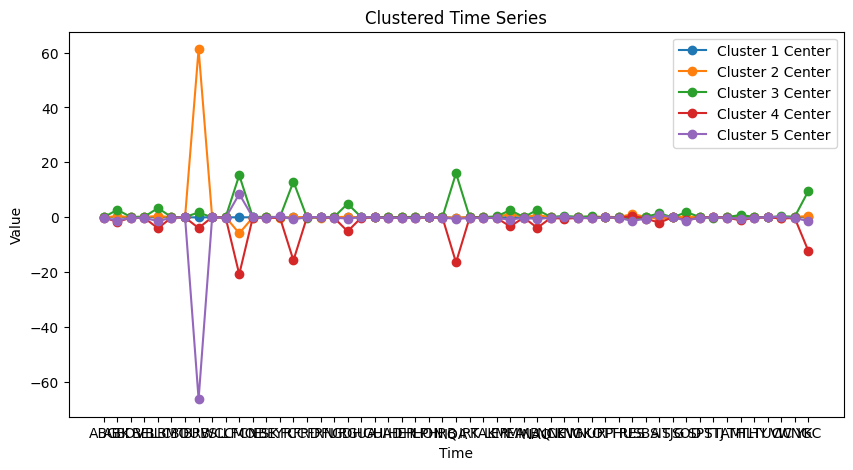

Cluster Labels: [0 0 0 ... 2 0 0]


In [68]:
# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Assign cluster labels to each time series
cluster_labels = kmeans.labels_

# Plot the clustered time series
plt.figure(figsize=(10, 5))
for i in range(k):
     plt.plot(allobsdbdt.columns, cluster_centers[i], label=f'Cluster {i+1} Center', marker='o')
plt.title('Clustered Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Display cluster labels
print("Cluster Labels:", cluster_labels)

In [ ]:
# Get closest cluster center for each data point
closest_cluster_center_indices = np.argmin(kmeans.transform(allobsdbdt), axis=1)
closest_cluster_centers = cluster_centers[closest_cluster_center_indices]

# Plot the closest cluster center for each label
plt.figure(figsize=(10, 5))
for i in tqdm.tqdm(range(k)):
    plt.plot(allobsdbdt.columns, cluster_centers[i], label=f'Cluster {i+1} Center', linestyle='dashed')
for i, cluster_center in tqdm.tqdm(enumerate(closest_cluster_centers)):
    plt.plot(allobsdbdt.columns, cluster_center, label=f'Closest Cluster to Label {i+1}', marker='o')

plt.title('Closest Cluster Center for Each Label')
plt.xlabel('Time Series')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

100%|██████████████████████████████████████████| 5/5 [00:00<00:00, 203.39it/s]
278763it [05:46, 568.65it/s] 